# MACHINE LEARNING CLASSIFICATION

In this notebook for classification practice I'm going to try and create a model to predict stage of breast cancer: M (Malignant) or B (Benign)
For this I'm going to be using dataset contaiting 30 different columns with measurements.

В этом ноутбуке для практики классификации я построю модель машинного обучения для определения стадии грудного рака: M (злокачественный) или B (доброкачественный).
Для этого я буду использовать датасет с 30 показателями.

Import all needed modules

Импорт модулей для работы

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics 
from sklearn.model_selection import cross_val_score as cv_score

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

Import the dataset

Импорт датасета

In [3]:
data = pd.read_csv("data.csv",header=0)

In [4]:
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

Shape of our dataframe is 569 rows to 33 columns. Let's look at data types that we have.

Форма нашего датафрейма 569 строк на 33 колонки. Посмотрим на тип данных в таблице.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Luckily for me, most of of columns are float64, non-null values, which I can work with right away.
However, I need to kick out column 'Unnamed: 32', since all values in this column are 0.

Большинство колонок датасета имеют значения типа float64 и non-null, что означает, что с ними можно сразу работать.
Однако, колонку 'Unnamed: 32' необходимо удалить, так как вся информация в ней нулевая.

In [7]:
data.drop("Unnamed: 32",axis=1,inplace=True)

Check that column has been dropped.

Убедимся, что колонки больше нет в датасете.

In [8]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

We also do not need 'id' column for running this analysis, so let's drop it as well.

Нам также не понадобится колонка 'id' в ходе этого анализа, так что ее можно удалить.

In [9]:
data.drop("id",axis=1,inplace=True)

Let's assign integers to our categorical variable of diagnosis, so that machine learning algorithm can operate it.

Заменим категории в колонке "diagnosis" на числа, чтобы алгоритм машинного обучения мог работать с этой колонкой.

In [10]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

Let's take a look at stats of our data

Посмотрим на статистику нашей таблицы.

In [11]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Data seems to be okay. Though, it is visible already that in this dataset we have more 0 than 1 in 'diagnosis' column, which is great, meaning our patients have benign stage of cancer.

Данные выглядят нормально. Однако сразу заметно, что в нашем датасете больше 0 значений в колонке 'diagnosis', что показывает, что в большинстве своем пациенты имеют доброкачественный рак груди.

For better visibility, let's plot counts of diagnises.

Посмотроим гистограмму распределения диагнозов.

E:\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

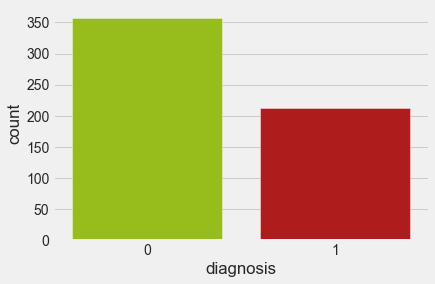

In [13]:
sns.countplot(data['diagnosis'],label="Count", palette=['#a5d801', '#c80304'])

This proves my initial call from the summary table that we have more patiens with benign cancer, meaning they have better chances of being cured.

Гистограмма подтверждает утверждение сделанное на основе сводной таблицы о том, что в датасете больше дата поинтов с доброкачественным раком груди. Это означает, что большинство пациентов имеют хорошие шансы на выздоравление.

Let's now draw a correlation heatmap, so we can remove multi-colinearity that might affect our model.

Посмотрим корреляционную карту, чтобы определить наиболее сильно коррелирующие показатели. Эти показатели могут влиять на качество модели машинного обучения, а потому должны быть исключены.

<AxesSubplot:>

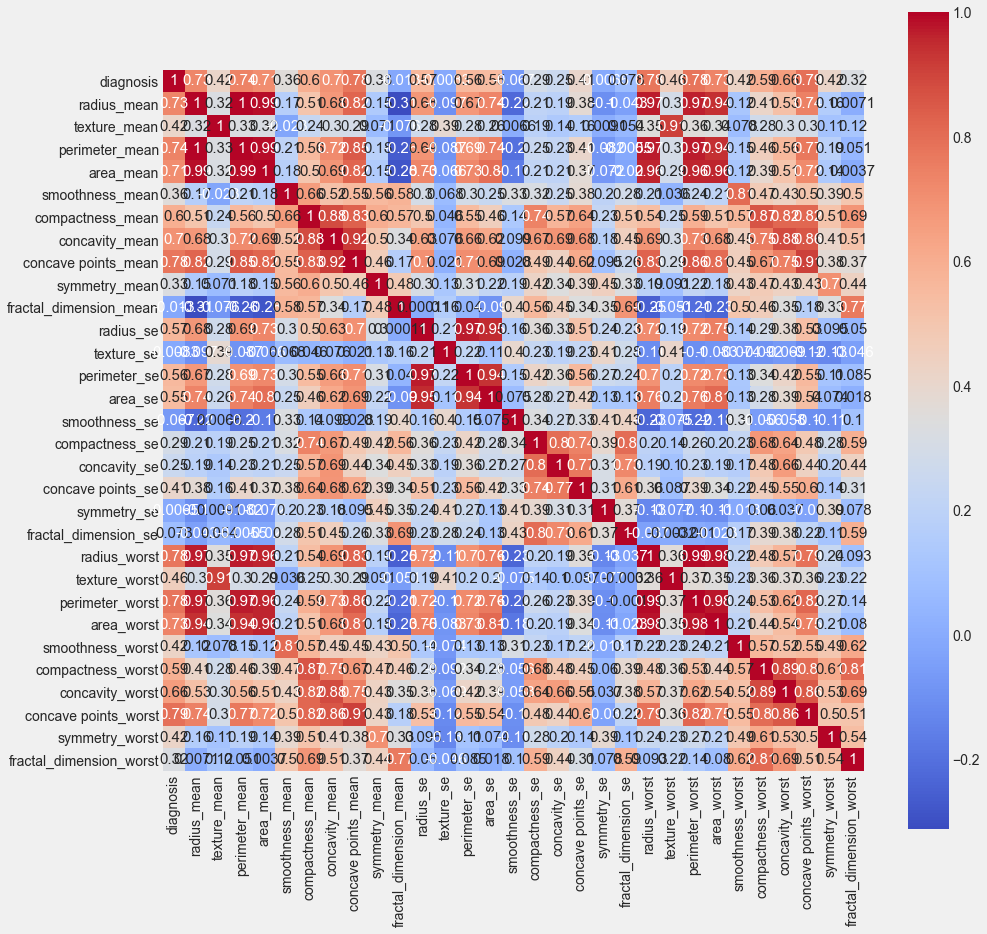

In [15]:
corr = data.corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, annot_kws={'size': 15},
           xticklabels= data.columns, yticklabels= data.columns,
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)

Graph is a little messy, because we have a lot of features, however, it is still visible that radius, perimeter and area mean and worst correlate highly with each other, so we are keeping only one of those variables for further work.
Radius, perimeter and area se also correlate strongly with each other, so we keep only one of those.
I'm going to do the same to compactness, concavity and concave points.

График несколько смешанный из-за того, что у нас много показателей в таблице, однако все еще видно, что 'radius', 'perimeter' и 'area' 'mean' и 'worst' сильно коррелируют друг с другом, поэтому из этих показателей мы оставим только один.
'radius_se', 'perimeter_se' и 'area_se' также сильно коррелируются между собой, так что мы оставим только один из этих показателей.
То же самое сделаем с 'compactness', 'concavity' и 'concave points'.

In [17]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
data = data[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'symmetry_worst', 'fractal_dimension_worst']]

<AxesSubplot:>

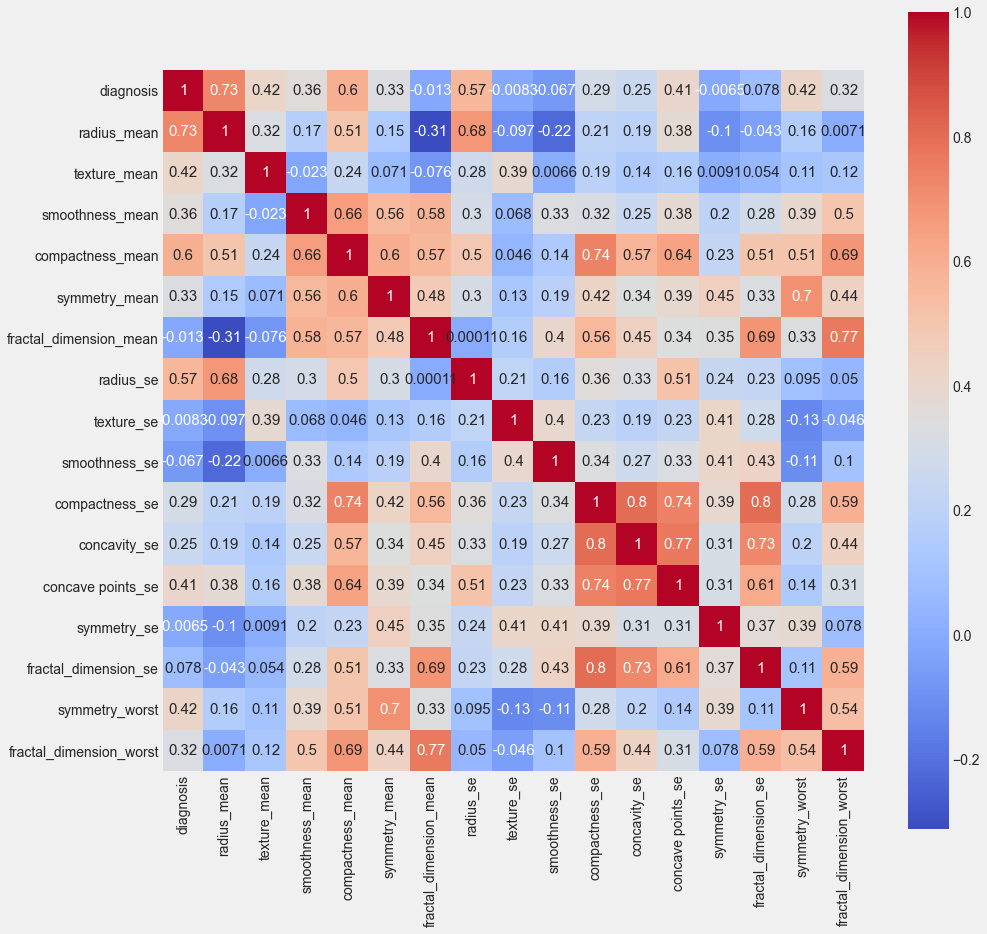

In [19]:
corr = data.corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, annot_kws={'size': 15},
           xticklabels= data.columns, yticklabels= data.columns,
           cmap= 'coolwarm')

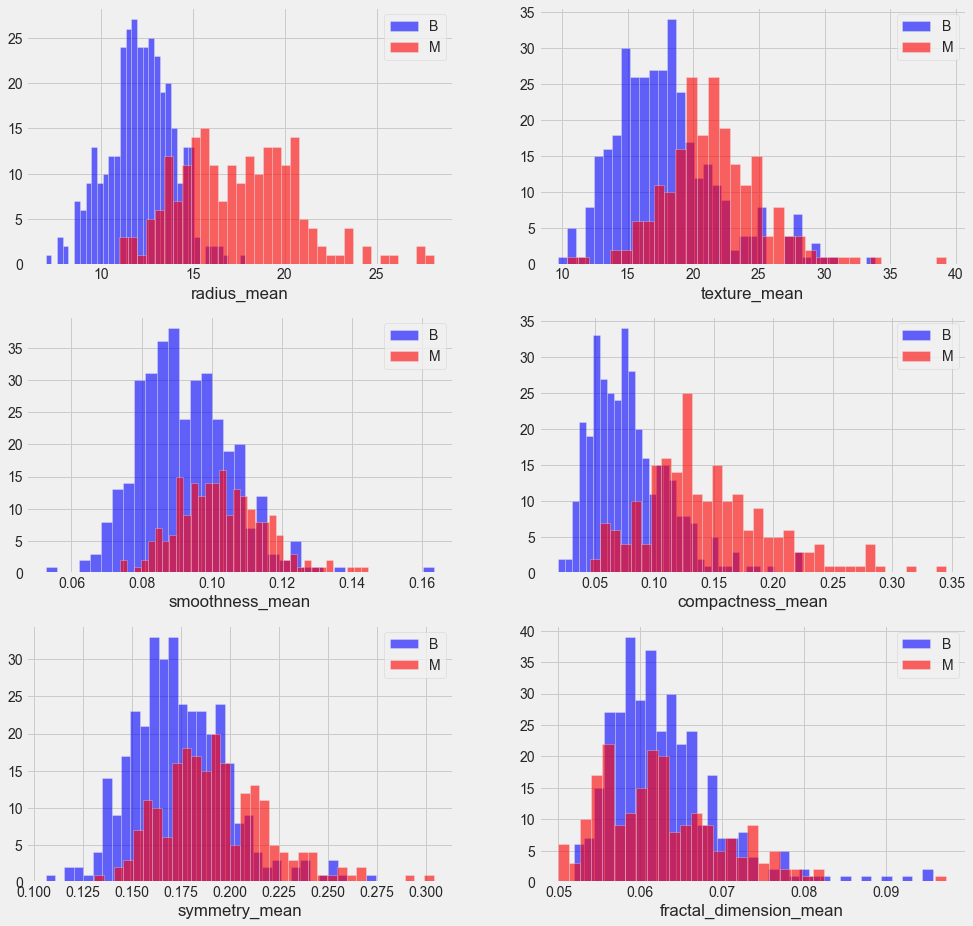

In [65]:
data = data[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'symmetry_worst', 'fractal_dimension_worst']]
part_1 = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']
part_2 = ['radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se']
part_3 = [ 'symmetry_se', 'fractal_dimension_se', 'symmetry_worst', 'fractal_dimension_worst']

plt.figure(figsize=(15,15))

for i, column in enumerate(part_1, 1):
    plt.subplot(3, 2, i)
    data[data['diagnosis'] == 0][column].hist(bins=35, color='blue', label='B', alpha=0.6)
    data[data['diagnosis'] == 1][column].hist(bins=35, color='red', label='M', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

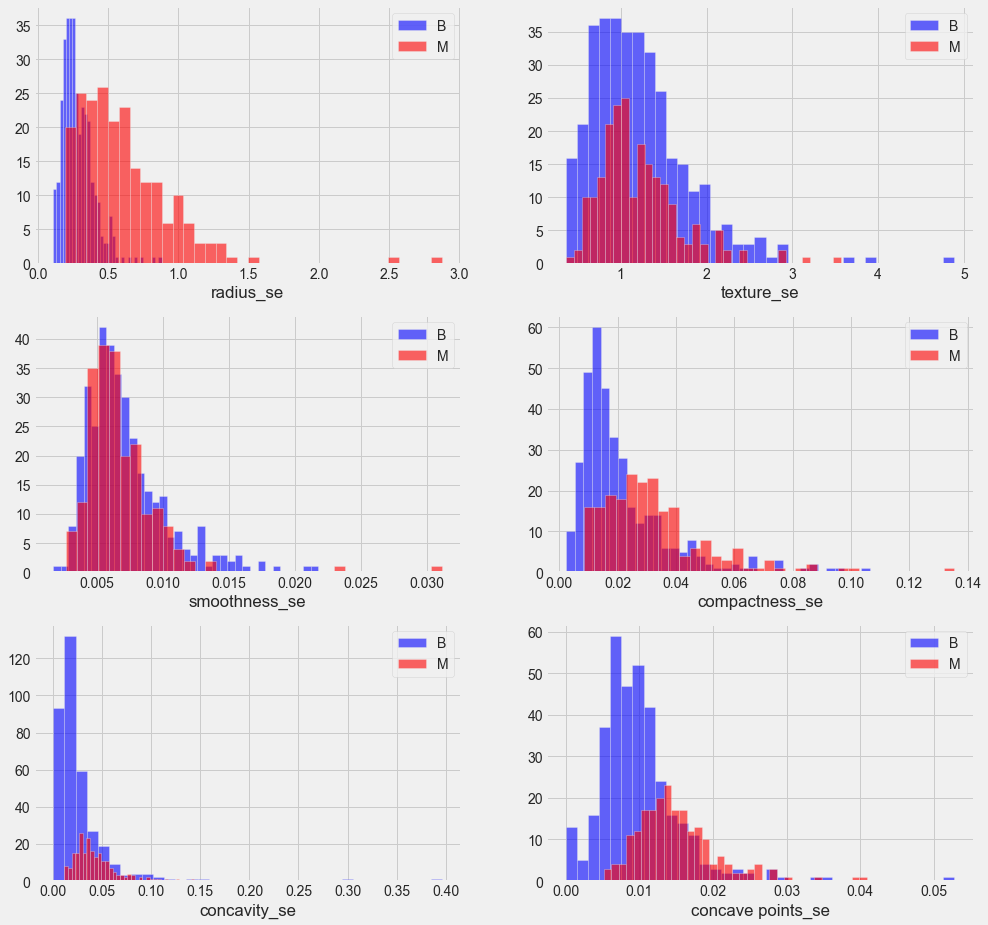

In [67]:
plt.figure(figsize=(15,15))

for i, column in enumerate(part_2, 1):
    plt.subplot(3, 2, i)
    data[data['diagnosis'] == 0][column].hist(bins=35, color='blue', label='B', alpha=0.6)
    data[data['diagnosis'] == 1][column].hist(bins=35, color='red', label='M', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

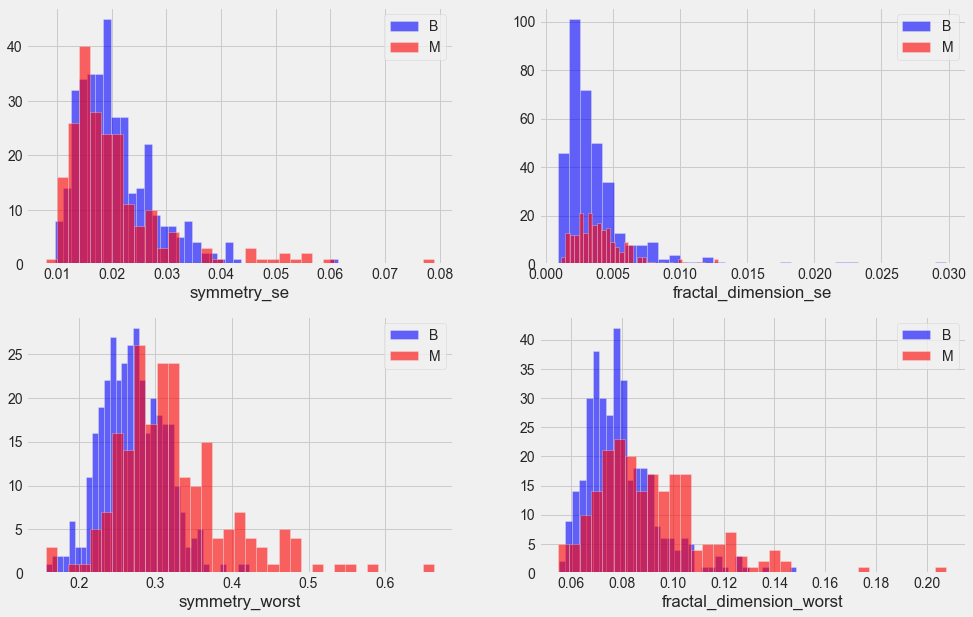

In [68]:
plt.figure(figsize=(15,15))

for i, column in enumerate(part_3, 1):
    plt.subplot(3, 2, i)
    data[data['diagnosis'] == 0][column].hist(bins=35, color='blue', label='B', alpha=0.6)
    data[data['diagnosis'] == 1][column].hist(bins=35, color='red', label='M', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**Observations:**

Patients with higher 'radius_mean', 'compactness_mean', 'radius_se', 'symmetry_worst', 'fractal_dimension_worst' have higher chances of having a malignant case.

**Наблюдения:**

Пациенты с высокими значениями 'symmetry_worst', 'fractal_dimension_worst' чаще имеют злокачественный случай.

Now we only have variables which correlate to each other up to 0.8, so let's get onto training our model.

Остались только показатели с корреляцией 0.8 и ниже, так же переходим к тренировке модели.

In [21]:
train, test = train_test_split(data, test_size = 0.3)

print(train.shape)
print(test.shape)

(398, 17)
(171, 17)


In [22]:
features = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'symmetry_worst', 'fractal_dimension_worst']

In [23]:
target = 'diagnosis'

In [24]:
X_train = train[features] 
y_train = train[target]

X_test = test[features]
y_test = test[target]   

Let's create function to get cross validation score and model evaluation metrics

Обозначим функции для получения показателя кросс валидации и метрик оценки модели

In [70]:
def cross_val(model):
    pred = cv_score(model, X_train, y_train, cv=10)
    return pred.mean()
    
def evaluate(true, predicted):
    acc = metrics.accuracy_score(predicted, true)
    rec = metrics.recall_score(predicted,true)
    prec = metrics.precision_score(predicted,true)
    f1_score = metrics.f1_score(predicted, true)
    return acc, rec, prec, f1_score

## Logistic Regression

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [28]:
log_pred = log_reg.predict(X_test)
log_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

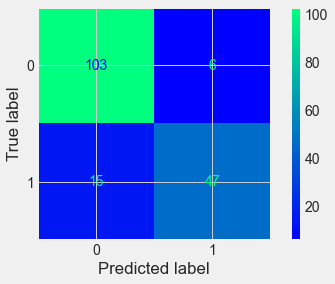

In [29]:
plot_confusion_matrix(log_reg, X_test, y_test, cmap='winter')  

In [71]:
results_df = pd.DataFrame(data=[["Logistic Regression", *evaluate(y_test, log_pred), cross_val(log_reg)]], 
                          columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1-score', "Cross Validation"])
results_df

,Model,Accuracy,Recall,Precision,F1-score,Cross Validation
0,Logistic Regression,0.877193,0.886792,0.758065,0.817391,0.909615


Logistic regression model on this dataset seems to be working fine, however, I would prefer to have higher recall, because I think it's more important in this case to identify all positive data points, even if at the cost of including more false positive.

Модель логистической регресии дает неплохие показатели качества на данном датасете, однако я бы хотела попробовать другие модели с целью увеличить recall модели, так как в данном случае важно определить все дата поинты с 'diagnosis' 1, даже если это будет означать уменьшение precision.

## Random Forest Classifier

In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

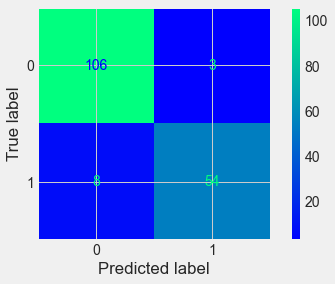

In [35]:
plot_confusion_matrix(rfc, X_test, y_test, cmap='winter')

In [36]:
results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", *evaluate(y_test, rfc_pred), cross_val(rfc)]], 
                          columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1-score', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Accuracy,Recall,Precision,F1-score,Cross Validation
0,Logistic Regression,0.877193,0.886792,0.758065,0.817391,0.901441
1,Random Forest Classifier,0.935673,0.947368,0.870968,0.907563,0.940226


Random Forest Classifier model on this dataset seems to be working fine and shows higher recall as well as cross valication score, so so far this model will be our prefered one.

Модель Random Forest Classifier дает отличные показатели, как recall, так и cross validation. Пока что, примем ее как за лучшую, но на всякий случай проверим еще Decision Tree Classifier.

## Decision Tree Classifier

In [38]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
dtc_pred = dtc.predict(X_test)
dtc_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

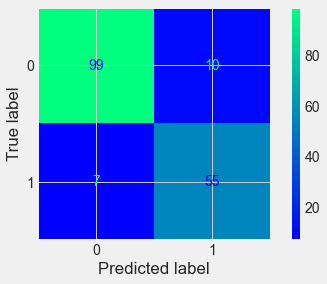

In [40]:
plot_confusion_matrix(dtc, X_test, y_test, cmap='winter')  

In [41]:
results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", *evaluate(y_test, dtc_pred), cross_val(dtc)]], 
                          columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1-score', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Accuracy,Recall,Precision,F1-score,Cross Validation
0,Logistic Regression,0.877193,0.886792,0.758065,0.817391,0.901441
1,Random Forest Classifier,0.935673,0.947368,0.870968,0.907563,0.940226
2,Decision Tree Classifier,0.900585,0.846154,0.887097,0.866142,0.882018


Random Forest Classifier model seem to perform the best. This model is prone to overfit without specifying parameters (such as depth or n_leaves), so let's check how it performs on training set.

In [43]:
rfc_train_pred = rfc.predict(X_train)
print(metrics.accuracy_score(rfc_train_pred, y_train))
print(metrics.recall_score(rfc_train_pred,y_train))
print(metrics.precision_score(rfc_train_pred,y_train))
print(metrics.f1_score(rfc_train_pred, y_train))

1.0
1.0
1.0
1.0


As I said earlier, it does overfit on training set. However, this model also shows good results on test set as well as valication score. 
Those results are also not so different from training set, so I would say this model is great to use for the task at hand.

Как я и предполагала, модель RFC оверфиттит на тренировочном датасете. Однако показатели recall на тестовом датасете не сильно хуже и кросс валидация также выдала хороший результат.
Как итог, модель RFC может быть использована для решения поставленной цели.